<a href="https://colab.research.google.com/github/sumeetku/Amber-detector/blob/main/license_plate_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **License Plate reading using OpenCV**


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import imutils

In [ ]:

img=cv2.imread('test.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

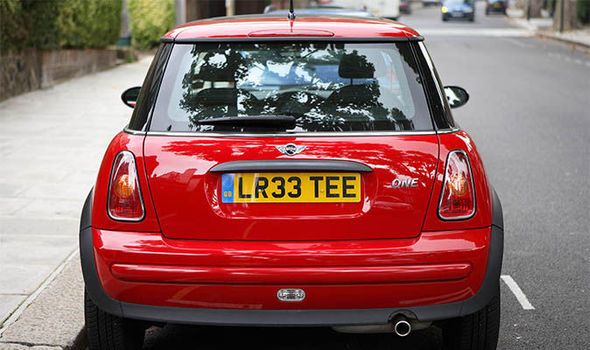

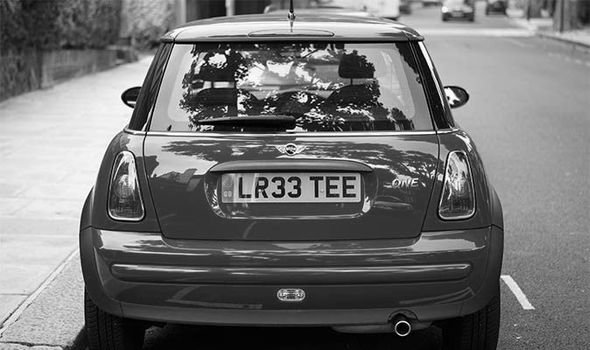

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(gray)

In [ ]:
imgBlurred = cv2.GaussianBlur(img, (7, 7), 0) 

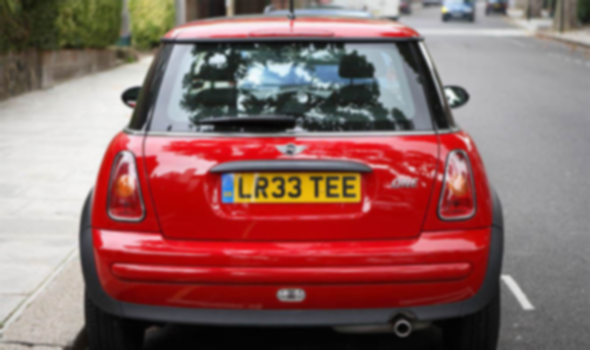

In [ ]:
cv2_imshow(imgBlurred)

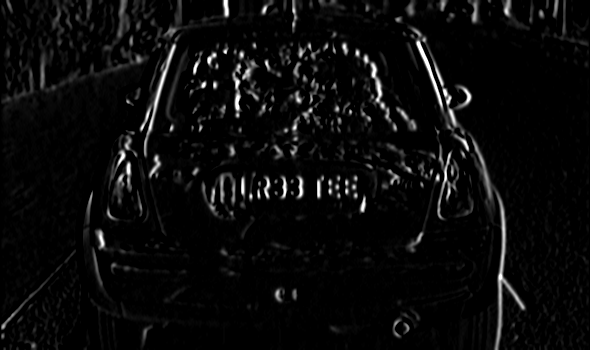

In [ ]:
gray = cv2.cvtColor(imgBlurred,cv2.COLOR_BGR2GRAY)  
sobelx = cv2.Sobel(gray, cv2.CV_8U,  
                       1, 0, ksize = 3)   
cv2_imshow(sobelx)

In [ ]:
ret2, threshold_img = cv2.threshold(sobelx,0, 255, 
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

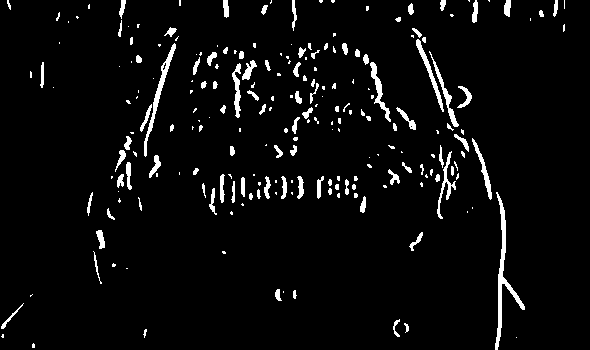

In [ ]:
cv2_imshow(threshold_img)

In [ ]:
morph_n_thresholded_img = threshold_img.copy() 

In [ ]:
cv2.morphologyEx(src = threshold_img, 
                     op = cv2.MORPH_CLOSE, 
                     kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(22, 3)),  
                     dst = morph_n_thresholded_img) 

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
def preprocess(input_img): 
  
    imgBlurred = cv2.GaussianBlur(input_img, (7, 7), 0) 
      
    # convert to gray 
    gray = cv2.cvtColor(imgBlurred, 
                        cv2.COLOR_BGR2GRAY)  
      
    # sobelX to get the vertical edges 
    sobelx = cv2.Sobel(gray, cv2.CV_8U,  
                       1, 0, ksize = 3)   
      
     # otsu's thresholding 
    ret2, threshold_img = cv2.threshold(sobelx,0, 255, 
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
 
    element_structure = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(22, 3))
    morph_n_thresholded_img = threshold_img.copy() 
    cv2.morphologyEx(src = threshold_img, 
                     op = cv2.MORPH_CLOSE, 
                     kernel = element_structure,  
                     dst = morph_n_thresholded_img) 
      
    return morph_n_thresholded_img 

In [ ]:
preprocess(img)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

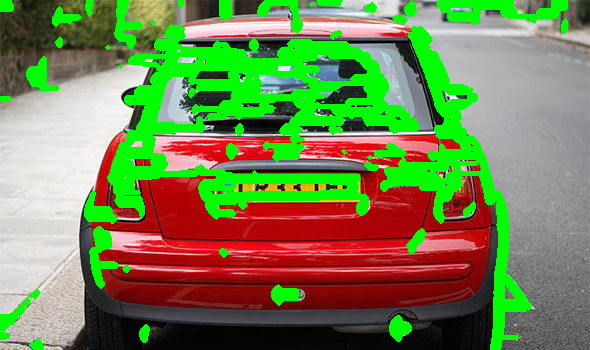

-1

In [ ]:
contours1,_=cv2.findContours(morph_n_thresholded_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img1=img.copy()
cv2.drawContours(img1, contours1, -1, (0,255,0), 3)
cv2_imshow(img1)
cv2.waitKey()

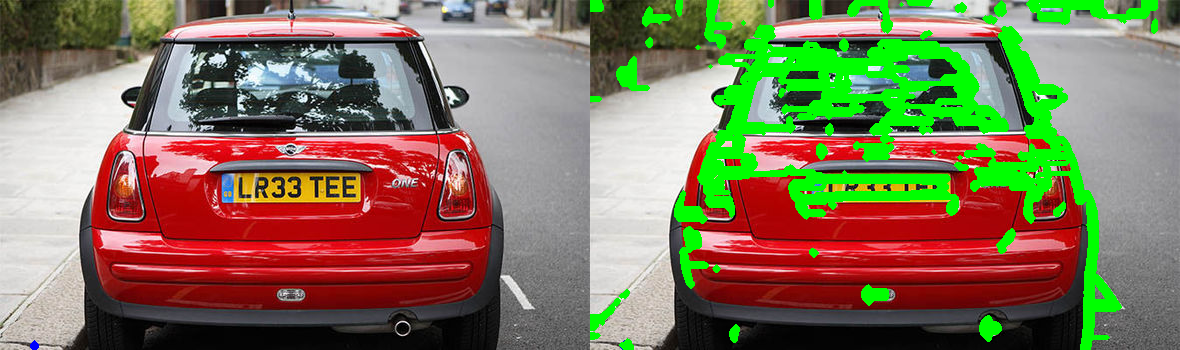

In [ ]:
out = np.hstack([img1, img])

# Now show the image
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.drawContours(img, contours1, -1, (0,255,0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 38,  53,  45],
        [ 38,  53,  45],
        [ 41,  54,  46]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 28,  43,  35],
        [ 29,  44,  36],
        [ 32,  45,  37]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 25,  40,  32],
        [ 27,  42,  34],
        [ 30,  43,  35]],

       ...,

       [[185, 195, 202],
        [179, 189, 196],
        [170, 180, 187],
        ...,
        [ 77,  77,  77],
        [ 97,  97,  97],
        [112, 112, 112]],

       [[180, 192, 198],
        [158, 170, 176],
        [137, 149, 155],
        ...,
        [ 78,  78,  78],
        [ 98,  98,  98],
        [108, 108, 108]],

       [[167, 179, 185],
        [140, 152, 158],
        [118, 130, 136],
        ...,
        [ 73,  73,  73],
        [ 76,  76,  76],
        [ 91,  91,  91]]